![Dr. Semmelweis](ignaz_semmelweis_1860.jpeg)

Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed fever patients. Childbed fever is a deadly disease affecting women who have just given birth, and in the early 1840s, as many as 10% of the women giving birth died from it at the Vienna General Hospital. Dr.Semmelweis discovered that it was the contaminated hands of the doctors delivering the babies, and on June 1st, 1847, he decreed that everyone should wash their hands, an unorthodox and controversial request; nobody in Vienna knew about bacteria.

You will reanalyze the data that made Semmelweis discover the importance of handwashing and its impact on the hospital.

The data is stored as two CSV files within the `data` folder.

`yearly_deaths_by_clinic.csv` contains the number of women giving birth at the two clinics at the Vienna General Hospital between the years 1841 and 1846.

| Column | Description |
|--------|-------------|
|`year`  |Years (1841-1846)|
|`births`|Number of births|
|`deaths`|Number of deaths|
|`clinic`|Clinic 1 or clinic 2|

`monthly_deaths.csv` contains data from 'Clinic 1' of the hospital where most deaths occurred.

| Column | Description |
|--------|-------------|
|`date`|Date (YYYY-MM-DD)
|`births`|Number of births|
|`deaths`|Number of deaths|

Rows: 12 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): clinic
dbl (3): year, births, deaths

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,births,deaths,clinic
<dbl>,<dbl>,<dbl>,<chr>
1841,3036,237,clinic 1
1842,3287,518,clinic 1
1843,3060,274,clinic 1
1844,3157,260,clinic 1
1845,3492,241,clinic 1
1846,4010,459,clinic 1
1841,2442,86,clinic 2
1842,2659,202,clinic 2
1843,2739,164,clinic 2


year,births,deaths,clinic,proportion_deaths
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1841,3036,237,clinic 1,0.07806324
1842,3287,518,clinic 1,0.15759051
1843,3060,274,clinic 1,0.08954248
1844,3157,260,clinic 1,0.08235667
1845,3492,241,clinic 1,0.06901489
1846,4010,459,clinic 1,0.11446384
1841,2442,86,clinic 2,0.03521704
1842,2659,202,clinic 2,0.07596841
1843,2739,164,clinic 2,0.05987587


Rows: 98 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (2): births, deaths
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


date,births,deaths,proportion_deaths
<date>,<dbl>,<dbl>,<dbl>
1841-01-01,254,37,0.145669291
1841-02-01,239,18,0.075313808
1841-03-01,277,12,0.043321300
1841-04-01,255,4,0.015686275
1841-05-01,255,2,0.007843137
1841-06-01,200,10,0.050000000


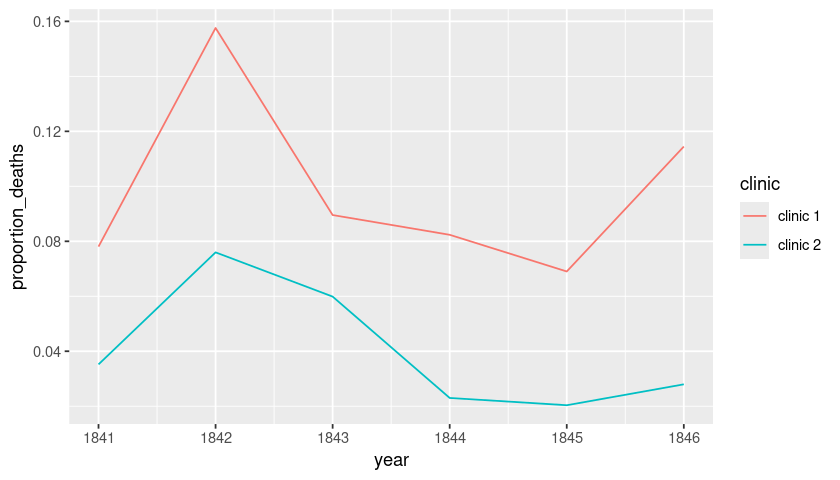

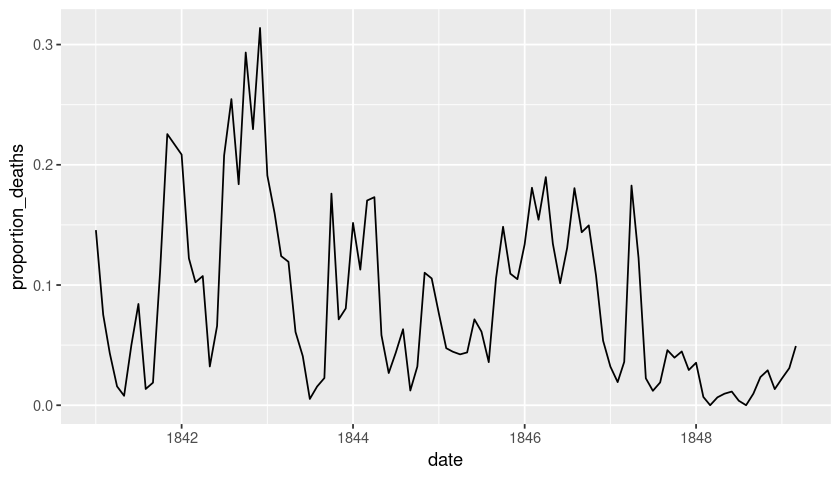

handwashing_started,mean_proportion_deaths
<lgl>,<dbl>
FALSE,0.10504998
TRUE,0.02109338



	Welch Two Sample t-test

data:  proportion_deaths by handwashing_started
t = 9.6101, df = 92.435, p-value = 1.445e-15
alternative hypothesis: true difference in means between group FALSE and group TRUE is not equal to 0
95 percent confidence interval:
 0.06660662 0.10130659
sample estimates:
mean in group FALSE  mean in group TRUE 
         0.10504998          0.02109338 


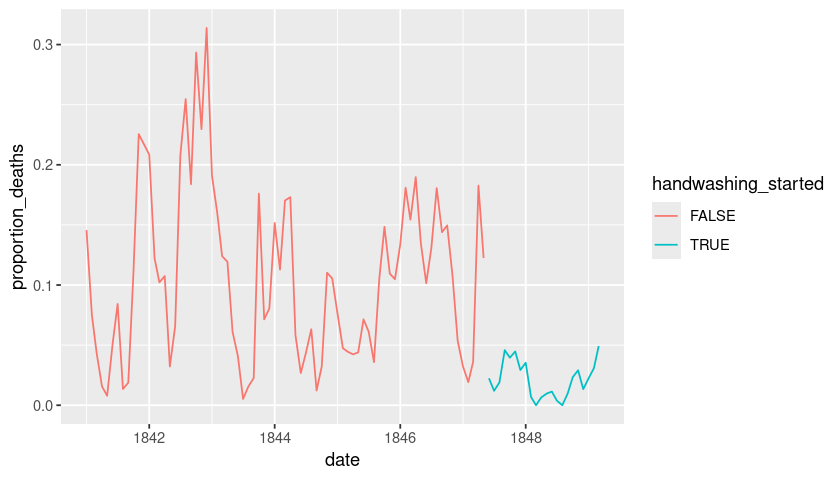

In [2]:
# Imported libraries
library(tidyverse)

# Start coding here..
yearly <- read_csv("data/yearly_deaths_by_clinic.csv")
yearly
yearly <- yearly %>%
   mutate(proportion_deaths = deaths / births)

# Print out yearly
yearly
options(repr.plot.width=7, repr.plot.height=4)

# Plot yearly proportion of deaths at the two clinics
p1 <- ggplot(yearly, aes(x = year, y = proportion_deaths,colour = clinic )) +
             geom_line()  
p1
monthly <- read_csv("data/monthly_deaths.csv")
monthly<- monthly %>%
   mutate(proportion_deaths = deaths / births)

# Print out the first rows in monthly
head(monthly)

p2 <- ggplot(monthly, aes(x = date, y = proportion_deaths )) +
             geom_line() + 
             labs(x = "date", y = "proportion_deaths")
p2
handwashing_start = as.Date('1847-06-01')

# Add a TRUE/FALSE column to monthly called handwashing_started
monthly <- monthly %>% 
    mutate(handwashing_started = ifelse(date >= handwashing_start, TRUE, FALSE))
 
# Plot monthly proportion of deaths before and after handwashing
p3 <- ggplot(monthly, aes(x = date, y = proportion_deaths, colour = handwashing_started )) +
             geom_line()
p3
monthly_summary <- monthly %>%
     group_by(handwashing_started) %>%
     summarize(mean_proportion_deaths = mean(proportion_deaths))

# Printing out the summary.
monthly_summary
test_result <- t.test( proportion_deaths ~ handwashing_started, data = monthly)
test_result

doctors_should_wash_their_hands <- TRUE

In [ ]:
# Load necessary libraries
library(dplyr)

# Pre-period proportions (Before handwashing)
pre_period_proportions <- c(
  0.1457, 0.0753, 0.0433, 0.0157, 0.0078, 0.05, 0.0842, 0.0135, 0.0188, 0.1102, 
  0.2255, 0.2085, 0.1222, 0.1023, 0.1074, 0.0323, 0.0659, 0.2078, 0.2546, 0.1839, 
  0.2934, 0.2297, 0.3138, 0.1912, 0.1597, 0.1241, 0.1193, 0.061, 0.0408, 0.0052, 
  0.0155, 0.0226, 0.176, 0.0714, 0.0805, 0.1516, 0.1128, 0.1703, 0.1731, 0.0583, 
  0.0268, 0.0437, 0.0632, 0.0122, 0.0323, 0.1102, 0.1055, 0.0759, 0.0474, 0.0445, 
  0.0423, 0.0439, 0.0714, 0.0612, 0.0359, 0.1055, 0.1484, 0.1094, 0.1049, 0.1339, 
  0.1809, 0.1543, 0.1897, 0.1344, 0.1015, 0.131, 0.1806, 0.1439, 0.1496, 0.1077, 
  0.0537
)

# Post-period proportions (After handwashing)
post_period_proportions <- c(
  0.0322, 0.0192, 0.0361, 0.1827, 0.1224, 0.0224, 0.012, 0.0189, 0.0458, 0.0396, 
  0.0447, 0.0293, 0.0353, 0.0069, 0, 0.0066, 0.0096, 0.0114, 0.0037, 0, 0.0096, 
  0.0234, 0.029, 0.0134, 0.0223, 0.0308, 0.0493
)

# Calculate means and variances
mean_pre <- mean(pre_period_proportions)
var_pre <- var(pre_period_proportions)

mean_post <- mean(post_period_proportions)
var_post <- var(post_period_proportions)

# Number of observations
n_before <- length(pre_period_proportions)
n_after <- length(post_period_proportions)

# Perform two-sample t-test
t_test_result <- t.test(pre_period_proportions, post_period_proportions, var.equal = TRUE)

# Test statistic and p-value
t_statistic <- t_test_result$statistic
p_value <- t_test_result$p.value

# Print test statistic and p-value
cat("Test Statistic:", t_statistic, "\n")
cat("P-Value:", p_value, "\n")

# Extract confidence interval
conf_interval <- t_test_result$conf.int

# Print confidence interval
cat("95% Confidence Interval: [", conf_interval[1], ", ", conf_interval[2], "]\n")


In [ ]:
# Load necessary libraries
library(dplyr)

# Pre-period proportions (Before handwashing)
pre_period_proportions <- c(
  0.1457, 0.0753, 0.0433, 0.0157, 0.0078, 0.05, 0.0842, 0.0135, 0.0188, 0.1102, 
  0.2255, 0.2085, 0.1222, 0.1023, 0.1074, 0.0323, 0.0659, 0.2078, 0.2546, 0.1839, 
  0.2934, 0.2297, 0.3138, 0.1912, 0.1597, 0.1241, 0.1193, 0.061, 0.0408, 0.0052, 
  0.0155, 0.0226, 0.176, 0.0714, 0.0805, 0.1516, 0.1128, 0.1703, 0.1731, 0.0583, 
  0.0268, 0.0437, 0.0632, 0.0122, 0.0323, 0.1102, 0.1055, 0.0759, 0.0474, 0.0445, 
  0.0423, 0.0439, 0.0714, 0.0612, 0.0359, 0.1055, 0.1484, 0.1094, 0.1049, 0.1339, 
  0.1809, 0.1543, 0.1897, 0.1344, 0.1015, 0.131, 0.1806, 0.1439, 0.1496, 0.1077, 
  0.0537
)

# Post-period proportions (After handwashing)
post_period_proportions <- c(
  0.0322, 0.0192, 0.0361, 0.1827, 0.1224, 0.0224, 0.012, 0.0189, 0.0458, 0.0396, 
  0.0447, 0.0293, 0.0353, 0.0069, 0, 0.0066, 0.0096, 0.0114, 0.0037, 0, 0.0096, 
  0.0234, 0.029, 0.0134, 0.0223, 0.0308, 0.0493
)

# Calculate means and variances
mean_pre <- mean(pre_period_proportions)
var_pre <- var(pre_period_proportions)

mean_post <- mean(post_period_proportions)
var_post <- var(post_period_proportions)

# Number of observations
n_before <- length(pre_period_proportions)
n_after <- length(post_period_proportions)

# Perform two-sample t-test
t_test_result <- t.test(pre_period_proportions, post_period_proportions, var.equal = TRUE)

# Test statistic and p-value
t_statistic <- t_test_result$statistic
p_value <- t_test_result$p.value

# Print test statistic and p-value
cat("Test Statistic:", t_statistic, "\n")
cat("P-Value:", p_value, "\n")

# Extract confidence interval
conf_interval <- t_test_result$conf.int

# Print confidence interval
cat("95% Confidence Interval: [", conf_interval[1], ", ", conf_interval[2], "]\n")
